In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('OTA_train.csv')
df

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,117267,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2380553,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,125075,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380554,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,127402,5,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380555,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,128251,3,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
# number of rows and columns
df.shape

(2380557, 54)

In [4]:
#column names
df.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'user_hist_stars', 'user_hist_paid', 'listing_country_id', 'listing_id',
       'listing_stars', 'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'log_click_proportion', 'distance_to_dest',
       'random_sort', 'competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff', 'competitor2_rate',
       'competitor2_has_availability', 'competitor2_price_percent_diff',
       'competitor3_rate', 'competitor3_has_availability',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability',
       'competitor5_price_percent_diff',

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [6]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,...,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,...,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,...,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000e+00,124.150000,0.000000e+00
50%,3.332720e+05,5.000000e+00,2.190000e+02,3.450000,152.620000,2.190000e+02,6.961500e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000e+00,219.185000,0.000000e+00
75%,5.007050e+05,1.400000e+01,2.190000e+02,3.950000,215.950000,2.190000e+02,1.051420e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000e+00,432.125000,0.000000e+00
max,6.655730e+05,3.400000e+01,2.310000e+02,5.000000,1507.120000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1363.000000,1.000000,1.000000,7951.000000,1.000000,1.000000,130000.000000,1.000000e+00,20238.720000,1.000000e+00


In [7]:
for i in df.columns:
    print(i,'-',len(df[i].value_counts()))

search_id - 95842
timestamp - 95578
site_id - 34
user_country_id - 192
user_hist_stars - 292
user_hist_paid - 4345
listing_country_id - 166
listing_id - 117378
listing_stars - 6
listing_review_score - 10
is_brand - 2
location_score1 - 337
location_score2 - 9082
log_historical_price - 381
listing_position - 40
price_usd - 62712
has_promotion - 2
destination_id - 13122
length_of_stay - 33
booking_window - 392
num_adults - 9
num_kids - 10
num_rooms - 8
stay_on_saturday - 2
log_click_proportion - 116185
distance_to_dest - 386387
random_sort - 2
competitor1_rate - 3
competitor1_has_availability - 3
competitor1_price_percent_diff - 1091
competitor2_rate - 3
competitor2_has_availability - 3
competitor2_price_percent_diff - 467
competitor3_rate - 3
competitor3_has_availability - 3
competitor3_price_percent_diff - 441
competitor4_rate - 3
competitor4_has_availability - 3
competitor4_price_percent_diff - 375
competitor5_rate - 3
competitor5_has_availability - 3
competitor5_price_percent_diff - 4

In [8]:
#Checking null values
df.isna().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

Text(0.5, 1.0, 'Time Series of room price by date time of search')

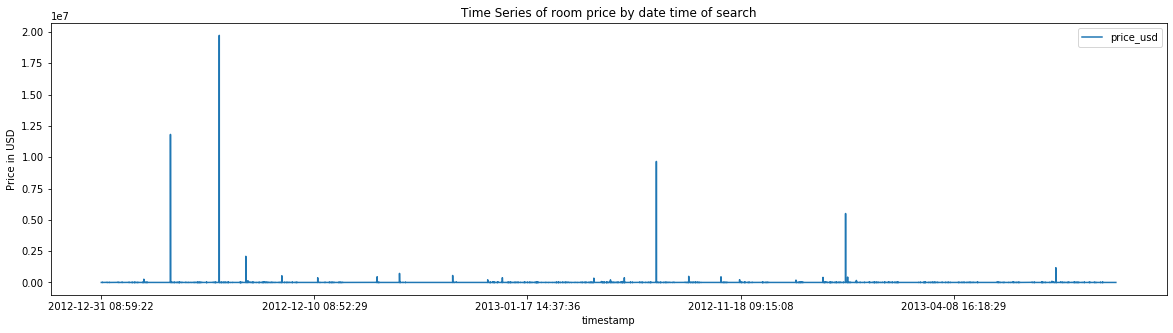

In [9]:
df.plot(x='timestamp', y = 'price_usd', figsize = (20,5))
plt.xlabel('timestamp')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')

In [10]:
df = df.loc[df['listing_id'] == 104517]

df = df.loc[df['user_country_id'] == 219]

df = df.loc[df['num_rooms'] == 1]

df = df[['timestamp', 'price_usd', 'booking_window', 'stay_on_saturday']]

In [11]:
df.describe()

,price_usd,booking_window,stay_on_saturday
count,748.000000,748.000000,748.000000
mean,110.884840,35.847594,0.520053
std,55.558643,44.392563,0.499932
min,0.120000,0.000000,0.000000
25%,66.000000,7.000000,0.000000
50%,102.000000,19.000000,1.000000
75%,139.250000,48.000000,1.000000
max,425.000000,288.000000,1.000000


In [12]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    748.000000
mean     110.884840
std       55.558643
min        0.120000
25%       66.000000
50%      102.000000
75%      139.250000
max      425.000000
Name: price_usd, dtype: float64

In [13]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2012-11-01 10:43:44
2013-06-30 07:03:56


In [14]:
df['timestamp'].describe()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,price_usd,booking_window,stay_on_saturday
4417,2013-05-19 19:52:42,68.0,42,0
6996,2013-05-20 08:14:41,209.0,5,1
8570,2013-05-21 18:49:33,66.0,7,0
8788,2012-11-25 18:24:55,52.0,26,1
13903,2012-11-18 22:06:17,68.0,3,0


[]

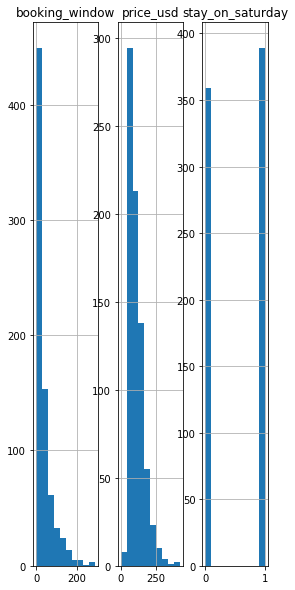

In [15]:
df.hist(layout=(1,20), figsize=(30,10))
plt.plot()

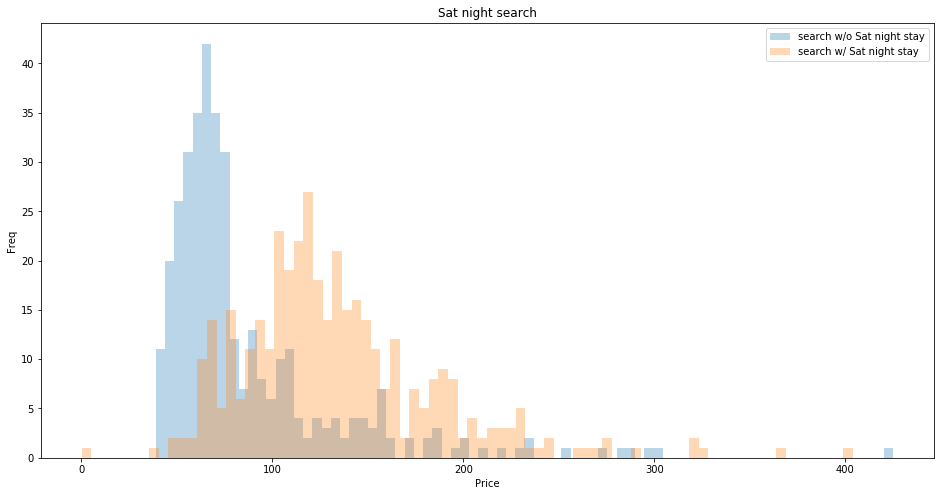

In [16]:
a = df.loc[df['stay_on_saturday'] == 0, 'price_usd']
b = df.loc[df['stay_on_saturday'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search w/o Sat night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search w/ Sat night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Sat night search')
plt.plot();

In [17]:
print('Kurtosis: %f' % df['price_usd'].kurt())
print('Skewness: %f' % df['price_usd'].skew())

Kurtosis: 3.517122
Skewness: 1.490691


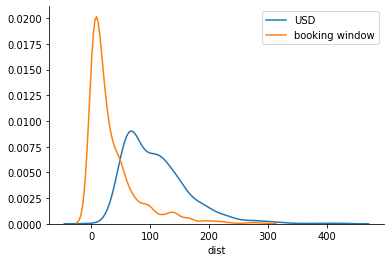

In [18]:
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

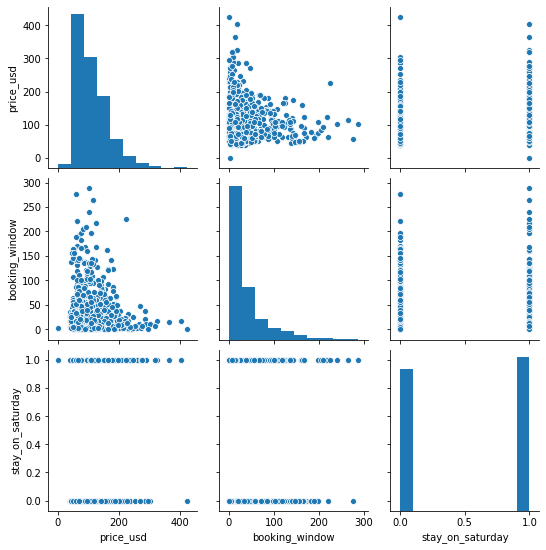

In [19]:
sns.pairplot(df)

In [20]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [21]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [22]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

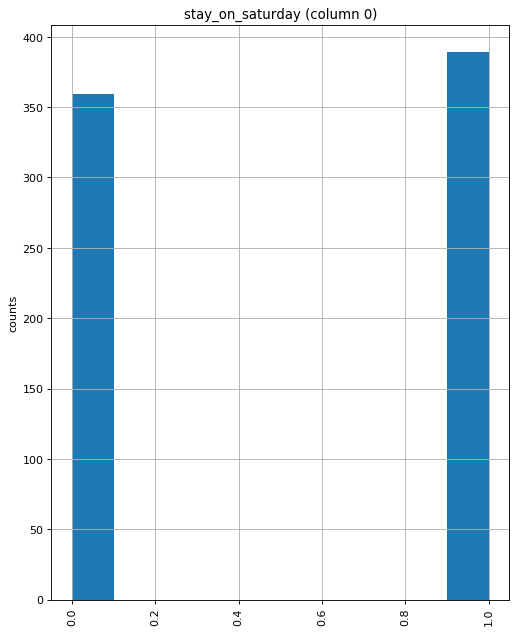

In [23]:
plotPerColumnDistribution(df, 10, 5)

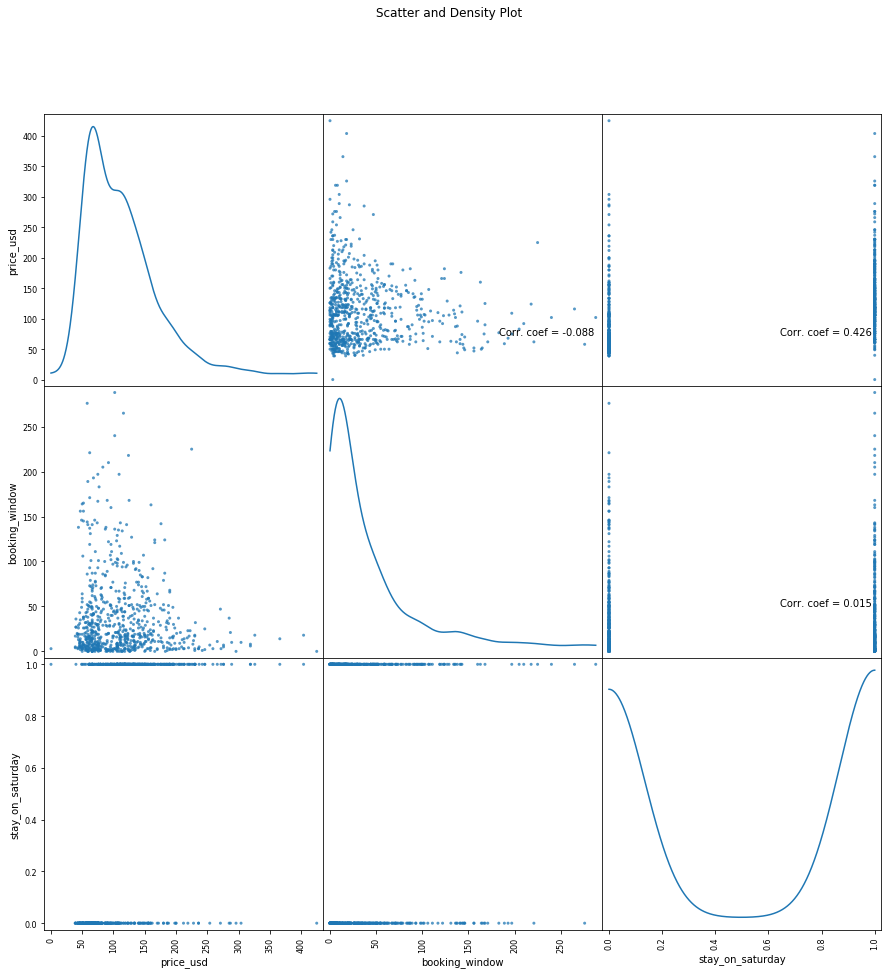

In [24]:
plotScatterMatrix(df, 15, 10)

In [25]:
df = df.sort_values('timestamp')
df['date_time_int'] = df.timestamp.astype(np.int64)

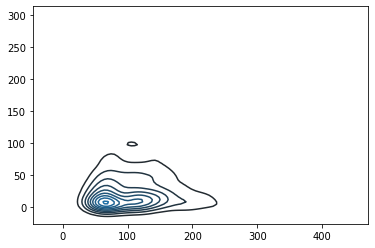

In [26]:
sns.kdeplot(df[["price_usd", "booking_window", "stay_on_saturday"]])

In [27]:
data = df[['price_usd', 'booking_window', 'stay_on_saturday']]
n_cluster = range(1, 20)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

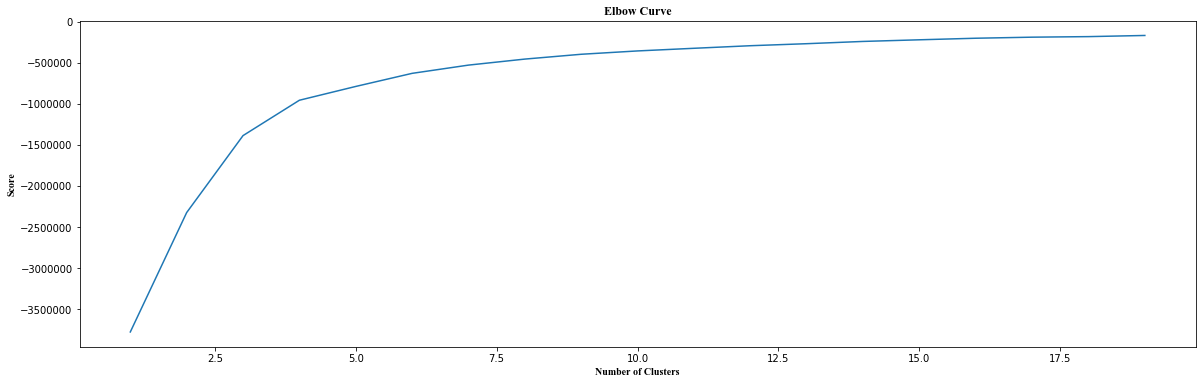

In [28]:
data = df[['price_usd', 'booking_window', 'stay_on_saturday']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters', fontname="Times New Roman",fontweight="bold")
plt.ylabel('Score',fontname="Times New Roman",fontweight="bold")
plt.title("Elbow Curve",fontname="Times New Roman",fontweight="bold")
plt.show();


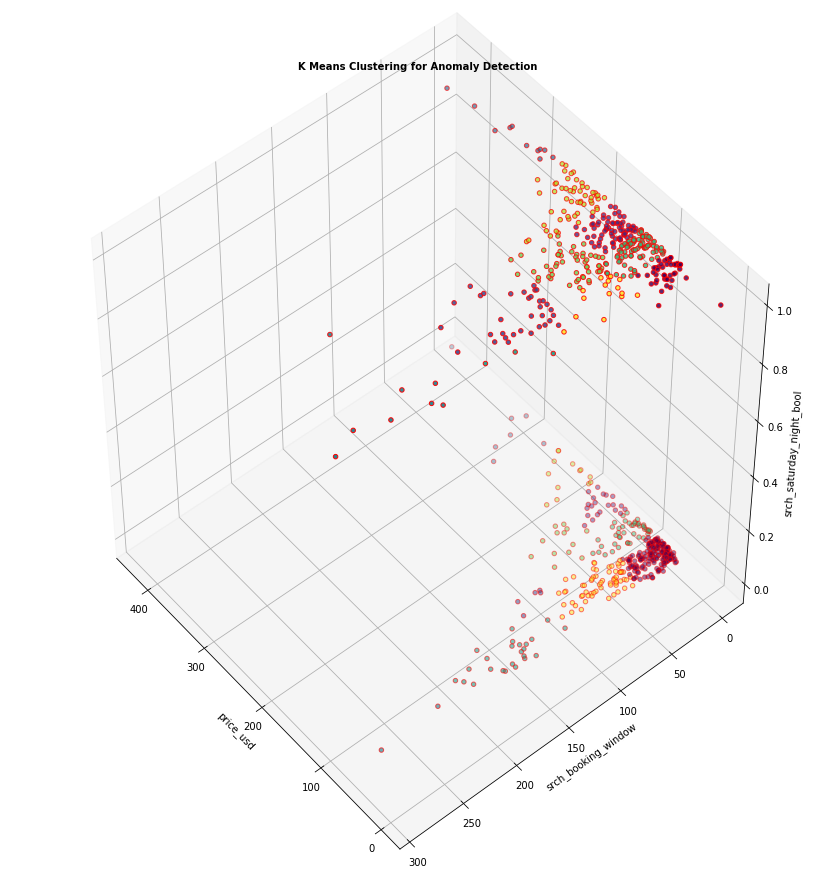

In [29]:
X = df[['price_usd', 'booking_window', 'stay_on_saturday']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=49, azim=140)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=labels.astype(np.float), edgecolor="r")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means Clustering for Anomaly Detection", fontsize=10, fontweight="bold");

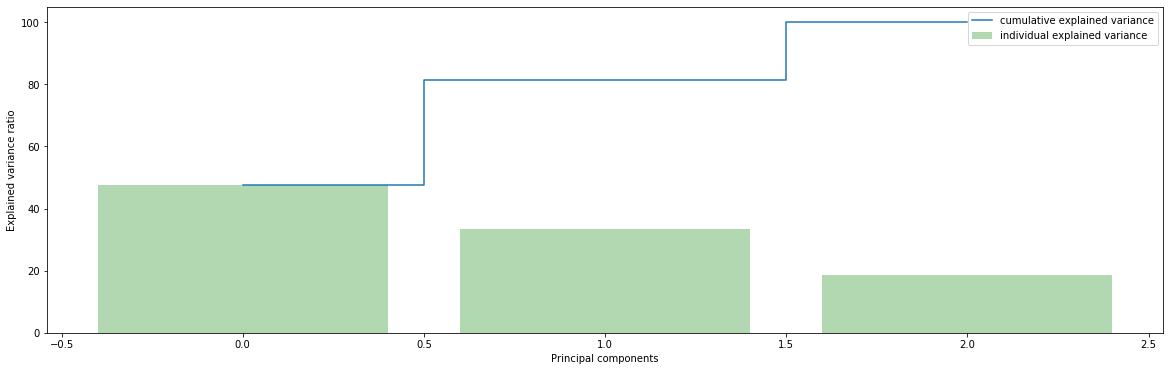

In [30]:
data = df[['price_usd', 'booking_window', 'stay_on_saturday']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp) 

plt.figure(figsize=(20, 6))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [31]:
data = df[['price_usd', 'booking_window', 'stay_on_saturday']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [32]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

5    170
3    154
7     97
8     84
1     81
4     53
9     40
0     37
2     23
6      9
Name: cluster, dtype: int64

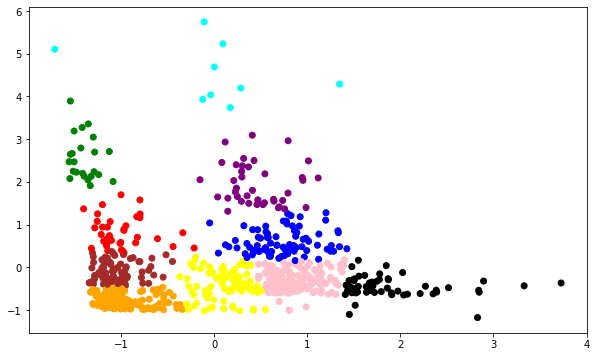

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show();